In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)


from data import *
from helpers import *


In [47]:
# Automated way to create labeled dataset
#directory='/../data_gated/'
#columns=['FSC-H', 'SSC-H', 'B530-H', 'B572-H', 'B675-H']
#create_labeled_dataset(directory,columns,label_gated=3,label_not_gated=1)

In [48]:
file = '../labeled_dataset/GL55_DN_3A.csv'
columns=['FSC-H', 'SSC-H', 'B530-H', 'B675-H','Width']
X,y = preprocess(file,columns)

In [49]:
run_FlowGrid(nbins=2,eps=1.2,isEvaluation=True)

In [50]:
output_labels = np.genfromtxt('fc_data_FlowGrid_label.csv', delimiter=',')

In [51]:
print(output_labels.shape)
print(X.shape)
print(y.shape)

(86228,)
(86229, 5)
(86229,)


<AxesSubplot:xlabel='B530-H', ylabel='B572-H'>

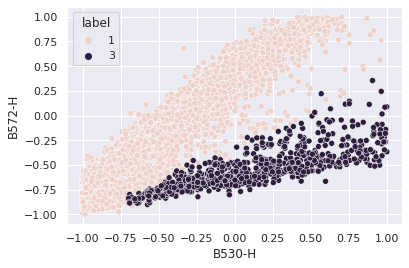

In [52]:
sns.scatterplot(data=X, x="B530-H", y="B572-H", hue=y)

<AxesSubplot:xlabel='B530-H', ylabel='B572-H'>

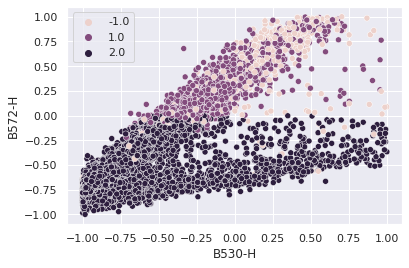

In [53]:
X = X.drop([0])
sns.scatterplot(data=X, x="B530-H", y="B572-H", hue=output_labels)

In [54]:
from sklearn.metrics.cluster import adjusted_rand_score

adjusted_rand_score(y.drop([0]), output_labels)

-0.006516392206651473

In [ ]:
#Files
file = '../labeled_dataset/GL53_UP_3A.csv'
columns=['FSC-H', 'SSC-H', 'B530-H', 'B572-H', 'B675-H']
df_labeled = pd.read_csv(file)

#creation of X and y
X,y = split_input_output(df_labeled,target_feature='label')

#Detect and remove outliers
X,y = remove_outliers(X,y,contamination=0.03)

#Standardize our data
scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
X[X.columns] = scaler.fit_transform(X[X.columns])

#Save file in csv format
save_to_csv(X,y)

In [ ]:
os.system("python ../FlowGrid/sample_code.py --f fc_data.csv --n 4 --eps 1.1")
output_labels = np.genfromtxt('fc_data_FlowGrid_label.csv', delimiter=',')


In [ ]:
#plot_results_b530_b572(X, columns, assignments=output_labels)
sns.scatterplot(data=X, x="B530-H", y="B572-H", hue=y)

In [ ]:
X = X.drop([0])
sns.scatterplot(data=X, x="B530-H", y="B572-H", hue=output_labels)

In [ ]:
#Files
file = '../labeled_dataset/GL55_DN_3A.csv'
columns=['FSC-H', 'SSC-H', 'B530-H', 'B572-H', 'B675-H']
df_labeled = pd.read_csv(file)

#creation of X and y
X,y = split_input_output(df_labeled,target_feature='label')

#Detect and remove outliers
X,y = remove_outliers(X,y,contamination=0.03)

#Standardize our data
scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
X[X.columns] = scaler.fit_transform(X[X.columns])

#Save file in csv format
save_to_csv(X,y)

In [ ]:
os.system("python ../FlowGrid/sample_code.py --f fc_data.csv --n 4 --eps 1.1")
output_labels = np.genfromtxt('fc_data_FlowGrid_label.csv', delimiter=',')

In [ ]:
#plot_results_b530_b572(X, columns, assignments=output_labels)

In [ ]:
sns.scatterplot(data=X, x="B530-H", y="B572-H", hue=y)

In [ ]:
X = X.drop([0])
sns.scatterplot(data=X, x="B530-H", y="B572-H", hue=output_labels)

## Automating the clustering and save outputs

In [ ]:
sns_plot.savefig("output.png")

# Older work without labeled dataset

## Clustering without labeled

In [ ]:
fc_data, channels = load_important_data('GL8_UP_1B.fcs','/../data/')

fc_data, tmp = standardize_log(fc_data)
fc_data, indices = remove_outliers_with_indices(fc_data, max_deviation = 4)

fc_subdata_array = np.array(fc_data)
np.savetxt("fc_data.csv", fc_subdata_array, delimiter=",")

os.system("python ../FlowGrid/sample_code.py --f fc_data.csv --n 2 --eps 1.1")

output_labels = np.genfromtxt('fc_data_FlowGrid_label.csv', delimiter=',')

fc_data = np.delete(fc_data, obj=0, axis=0)

plot_results_b530_b572(fc_data, channels, assignments=output_labels)

## Density gating

In [ ]:
#fc_data, channels = load_important_data('GL8_UP_1B.fcs')
s = FlowCal.io.FCSData('../data/GL8_UP_1B.fcs')
s = FlowCal.transform.to_rfi(s)
s_g1 = FlowCal.gate.high_low(s, channels=['B530-H','B572-H'])
FlowCal.plot.density2d(s_g1, channels=['B530-H','B572-H'], mode='scatter')
plt.show()

In [ ]:
s_g2 = FlowCal.gate.high_low(s_g1, channels='B530-H', low=25)
FlowCal.plot.density2d(s_g2, channels=['B530-H','B572-H'], mode='scatter')
plt.show()

In [ ]:
s_g4 = FlowCal.gate.density2d(s_g1,channels=['B530-H','B572-H'], gate_fraction=0.75)
FlowCal.plot.density2d(s_g4,channels=['B530-H','B572-H'],mode='scatter')
plt.show()

## Other clustering algo without labeled dataset

In [ ]:
fc_data, channels = load_important_data('GL9_DN_1A.fcs','/../data/')

fc_data, tmp = standardize_log(fc_data)
fc_data, indices = remove_outliers_with_indices(fc_data, max_deviation = 4)

fc_subdata_array = np.array(fc_data)
np.savetxt("fc_data.csv", fc_subdata_array, delimiter=",")

os.system("python ../FlowGrid/sample_code.py --f fc_data.csv --n 2 --eps 1.1")

output_labels = np.genfromtxt('fc_data_FlowGrid_label.csv', delimiter=',')

fc_data = np.delete(fc_data, obj=0, axis=0)

plot_results_b530_b572(fc_data, channels, assignments=output_labels)

In [ ]:
s = FlowCal.io.FCSData('../data/GL9_DN_1A.fcs')
s = FlowCal.transform.to_rfi(s)
s_g1 = FlowCal.gate.high_low(s, channels=['B530-H','B572-H'])

s_g4 = FlowCal.gate.density2d(s_g1,channels=['B530-H','B572-H'], gate_fraction=0.75)
FlowCal.plot.density2d(s_g4,channels=['B530-H','B572-H'],mode='scatter')
plt.show()

In [ ]:
fc_data, channels = load_important_data('GL11_UP_2A.fcs','/../data/')

fc_data, tmp = standardize_log(fc_data)
fc_data, indices = remove_outliers_with_indices(fc_data, max_deviation = 4)

fc_subdata_array = np.array(fc_data)
np.savetxt("fc_data.csv", fc_subdata_array, delimiter=",")

os.system("python ../FlowGrid/sample_code.py --f fc_data.csv --n 2 --eps 1.1")

output_labels = np.genfromtxt('fc_data_FlowGrid_label.csv', delimiter=',')

fc_data = np.delete(fc_data, obj=0, axis=0)

plot_results_b530_b572(fc_data, channels, assignments=output_labels)